
##### **A Quick Look on COVID19 Situation of US and Your Neighborhood**
-----------------------

# Table of Contents
[1. Motivation](#motivation)<br> 
[2. Data](#DATA)
>   [2 i. Pipeline](#pipeline)<br>
    [2 ii. Feature Exploration](#explore)<br>
    [2 iii. Evidence for the Motivation](#moto)<br>
    
[3. Hypothesis Testing](#hypo)
> [3 i. Set-Up](#setup)<br>
> [3 ii. Welch Test Statistic & Student t- test](#welch)<br>
> [3 iii. P-value](#pval)<br>

[4. Conclusion](#conclude)

[5. Appendix](#Appendix)
<img src="images/PngItem_570550.png" />

# Motivation
<a id="motivation"> </a>

## Background

> **"The death of one man is a tragedy. The death of millions is a statistic."**    - Original by Kurt Tucholsky as a Joke

On Apr 4th 2020, there are more than 1 **million** COVID19 case worldwide and more than 300,000 cases in US and keep surging. 2/3 of Americans were under lockdown. 

On one side, people don't know what happens around their neighborhood. On the other side, politicians has been making conflict and chaos statement about the situation. 

The rationale behind this project we want to awake people before they are getting numb with the situation. As a future Data Scientist, what can we do to help people?

Providing **relevant and precise** information to people.

## Goal

There are two main objectives of this project, one is to provide an easy access method for people getting correct information of their neighborhood. 

The second is to test one of the scary statement made by Mayor of Los Angeles that LA was 5 days behind NYC on few days ago.


What's more, we will try exploring what can we learned from South Korea which is treated as the most successful country in controlling the COVID-19.

----------------


# Where do we get data?

One of the barriar of people getting infomation they need is various information source. We choosed most creditable and widely cited data source from Johns Hopkins. Additional, we will webstrap text content from press releases and transform into data we need.

**Source** See [Appendix - Data Source](#DataSource)

## Data Structure

<a id="DATA"> </a>

We obtain two types of data representing the COVID-19 situation.
* **Test Data**

    * Date
    * Country (Only for US and Korea)
    * States (Only for US)
    * Number of Test Perform
    * Number of Test Positive
    * Number of Test Negative    
    
    
* **Case Data**

    * Date
    * Country 
    * States (Only for US)
    * Community (Only for LA County)
    * Number of Confirmed Case
    * Number of Death Case
    * Number of Recovered Case   
    * Number of Active Case   
    
Jump to [EDA](#EDA) if you are not interested in web straping and data cleaning.



## Data acquisition

Beside the data were well organized and available for download, one most important technique for obtaining data is **web scraping**.

### Web Scraping

Here is a demonstration of web straping for sample page of a press release of the Department of Public Health of Los Angeles County.
<img src="images/sample_data_LA1.png" />

Every page would generate one single record through web straping. We could obtain the Date of a single record from the top left of page. 

<img src="images/sample_data_LA2.png" />
From the bottom, we could get confirmed cases and its infective density for each community in LA county.

The process is implement by a pre-define webscrap class `webscrape` including functions for getting tables, get text and get urls. The class definition is stored as `./src/web_scraping`.
Sample data as below.

| city | April 08, 2020 | 
|--------------------------|----|
| City of Agoura Hills     | 19 | 
| City of Alhambra	     | 26 | 	
| City of Arcadia     | 17 | 			


### Pipeline

Before merge everyday data, we need to double check data on consistency. Figure out some data were build on inconsist city name.

| city | March 26, 2020 | 
|--------------------------|----|
| Agoura Hills     | 5 | 
| Alhambra	     | 8 | 	
| Arcadia     | 6 | 			

We create rules to transform city name in a same scale and merge into a ready dataset.


| city | April 08, 2020 | April 07, 2020 | April 06, 2020 | ... | March 26, 2020 |... |
|--------------------------|-------|-------|-------|-------|-------|------|
| City of Agoura Hills     | 19 |  19 | 18 | ... | 5 |... |
| City of Alhambra	     | 26 |  24 | 22 | ... | 8 |  ... | 				
| City of Arcadia     | 17 |  17 | 16 | ... | 6 |... | 		


In [ ]:
Demonstrates sufficient amount of analysis to properly identify data
trends and/or relationships

In [ ]:
Demonstrates an understanding of the data as it relates to the project
question

In [ ]:
- Chooses speaking points that are considered technologically interesting
to the data science community; avoids topics that are considered
common knowledge or uninteresting analysis
- Articulates metrics used for model validation (Not applicable if you
choose not to include a model for Capstone I)
- Presents modeling results in a way that is understandable to a technical
and non-technical audience alike (Not applicable if you choose not to
include a model for Capstone I)
- Final product addresses original business problem or research question.

------------------------

# EDA<a id="EDA"> </a>

-------------------

## EDA on Case Data

There are two types of case data, one is cross-section data describe a single day all kind of record of different area. The other one is a panel data focused on one attribute of different area over time.


### Cross-section data

First, we takes a look at the schema of the dataset.

|  #  | Column        |  Non-Null | Count | Dtype  | 
| --- |  ------        |   --------| ------ |  -----  | 
| 0  | FIPS           | 2603 | non-null |  float64| 
| 1  | Admin2         | 2614 | non-null |  object | 
| 2  | Province_State | 2703 | non-null |  object | 
| 3  | Country_Region | 2883 | non-null |  object | 
| 4  | Last_Update    | 2883 | non-null |  object | 
| 5  | Lat            | 2823 | non-null |  float64 | 
| 6  | Long_          | 2823 | non-null |  float64 | 
| 7  | Confirmed      | 2883 | non-null |  int64  | 
| 8  | Deaths         | 2883 | non-null |  int64  | 
| 9  | Recovered      | 2883 | non-null |  int64  | 
| 10 | Active         | 2883 | non-null |  int64  |
| 11 | Combined_Key   | 2883 | non-null |  object | 

The variables we most care about are `Confirmed, Deaths, Recovered, Active` 4 columns. 

Hence, we will explore the inner relationship among them through a pairwise scatter plot through `seaborn`.

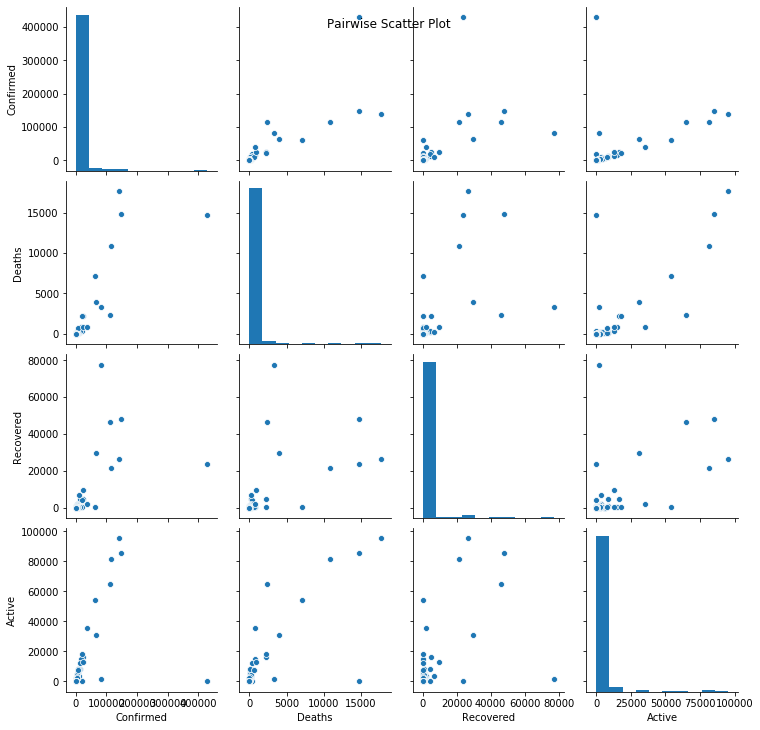

As we can see from the plots, **all the death, recovered and active case has a positive relationship on confirmed case.** So if we want to see a small number in death, we need to see a low level of confirm case.


# Appendix
<a id="Appendix"> </a>

**Data Source**
<a id="DataSource"> </a>
- **Getting CSSE data on github**

    source: https://github.com/CSSEGISandData/COVID-19 by Johns Hopkins CSSE


- **Gather state testing data thru API**

    source: https://covidtracking.com/data 
    - US Testing in Time Series https://covidtracking.com/api/us/daily.csv
    - States Historical Data https://covidtracking.com/api/states/daily.csv


- **Webscrap korean testing data**

    Source: CDC of South Korean
    - sample data https://www.cdc.go.kr/board/board.es?mid=&bid=0030&act=view&list_no=366735
    
    
- **Webscrap LA community level data**

    Source: The Department of Public Health of Los Angeles County
    - sample data http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2298
    
---------------------------------